In [221]:
# This code is designed for initial wave pickup by AIC method.
# Step1：establish characteristic function: X=|S(i)-S(i-1)|
# Step2：establish 'Akaike Informaiton Criterion' by two parts: AIC=i*ln(var(x(1,i)))+(N-i-1)*ln(var(x(i+1,N))), x∈ X。
##################################################################
# This section 1 is to define function 'AIC'


%matplotlib inline                  
import numpy as np                  # get numpy package
from matplotlib import pyplot       #from matplotlib import pyplot
def AIC(S,i):                       #Define AIC function including original wave signal data array S and series number i
    S=np.append([0],S)              # S is the raw data. Here define S[-1] is zero; add S[-1]=0 on top of the S array 
    X=np.diff(S)                    # Define X as S[n+1]-S[n]
    std1=np.std(X[0:i])             #Step1: calculate the standard deviation of the 1st part of AIC function
    std2=np.std(X[i+1:len(X)])      #Step2: calculate the standard deviation of the 2nd part of AIC function
    if std1==0.0:                   #if std1=var(x(1,i))=0，make std1 equal to a related small number such as 0.001
        std1=0.001                 
    elif std2==0:                   #if std2=var(x(i+1,N))=0，make std2 equal to a related small number such as 0.001
        std2=0.001
    part1=i*np.log(std1)            #Calculate the two parts and sum of them
    part2=(len(X)-i-1)*(np.log(std2))
    AIC=part1+part2                 #Define the AIC function
    return AIC                      #Return the output of AIC
              


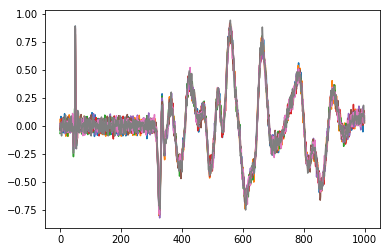

In [222]:
# This section 2 is to read the excel file and get the sheet->column interested

import pandas as pd                
#To read excel, option1: xls=pd.read_excel('20180521_1423.xlsx',na_value=0).fillna(0) 
#Change all NAN to 0
#option2: xls = pd.read_excel('AIC output.xlsx', sheetname=[0,1],skiprows=[1])

xls = pd.ExcelFile('20180521_1423.xlsx') # read entire excel file

Transmitter0 =xls.parse(1)              # get the 2nd sheet into a new array Transmitter0
Transmitter1 =xls.parse(2)
Transmitter2 =xls.parse(3)
Transmitter3 =xls.parse(4)
Transmitter4 =xls.parse(5)
Transmitter5 =xls.parse(6)
Transmitter6 =xls.parse(7)
Transmitter7 =xls.parse(8)
#Another option is: table = xls.parse('Transmitter1', dtype='object'), another method to get the sheet ‘Tansmitter1’

S0=Transmitter0['Receiver6']          # get the Receiver6 column into a new list S0
S1=Transmitter1['Receiver6']
S2=Transmitter2['Receiver6']
S3=Transmitter3['Receiver6']
S4=Transmitter4['Receiver6']
S5=Transmitter5['Receiver6']
S6=Transmitter6['Receiver6']
S7=Transmitter7['Receiver6']

pyplot.plot(S0)
pyplot.plot(S1)
pyplot.plot(S2)
pyplot.plot(S3)
pyplot.plot(S4)
pyplot.plot(S5)
pyplot.plot(S6)
pyplot.plot(S7)


pyplot.savefig('raw pulse.pdf')

C:\Users\19107107\AppData\Local\Continuum\anaconda2\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\19107107\AppData\Local\Continuum\anaconda2\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\19107107\AppData\Local\Continuum\anaconda2\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


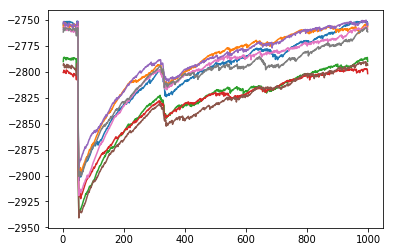

In [223]:
# This section 3 is to use the pre defined fuction 'AIC' in the section 1 to calculate the AIC-ouput for each sheet->column

AIC_output0=[]           # create AIC output list
AIC_output1=[]
AIC_output2=[]
AIC_output3=[]
AIC_output4=[]
AIC_output5=[]
AIC_output6=[]
AIC_output7=[]


for i in range(1000):
    AIC_output0.append(AIC(S0,i))
    AIC_output1.append(AIC(S1,i))
    AIC_output2.append(AIC(S2,i))
    AIC_output3.append(AIC(S3,i))
    AIC_output4.append(AIC(S4,i))
    AIC_output5.append(AIC(S5,i))
    AIC_output6.append(AIC(S6,i))
    AIC_output7.append(AIC(S7,i))
     
pyplot.plot(AIC_output0)
pyplot.plot(AIC_output1)
pyplot.plot(AIC_output2)
pyplot.plot(AIC_output3)
pyplot.plot(AIC_output4)
pyplot.plot(AIC_output5)
pyplot.plot(AIC_output6)
pyplot.plot(AIC_output7)


pyplot.savefig('AIC output.pdf')


In [224]:
# This section 4 is to prepare the data ready for writing into the excel as output

def outdata(S, AIC_output):
    S = np.array(S).reshape(-1, 1)                     # transform S from list to one column matrix
    AIC_output = np.array(AIC_output).reshape(-1, 1)   # transform AIC_output from list to one column matrix
    out = np.hstack((S,AIC_output))                    # combine S and AIC_output into a new matrix out with 2 column
    return out

out0 = outdata (S0, AIC_output0)
out1 = outdata (S1, AIC_output1)
out2 = outdata (S2, AIC_output2)
out3 = outdata (S3, AIC_output3)
out4 = outdata (S4, AIC_output4)
out5 = outdata (S5, AIC_output5)
out6 = outdata (S6, AIC_output6)
out7 = outdata (S7, AIC_output7)

writer = pd.ExcelWriter('AIC output.xlsx')  # Create an AIC output.xlsx file (empty file for writing data)

pd.DataFrame(out0).to_excel(writer,sheet_name='Transmitter0',header=['Pulse','AIC'],index=True)  # 向该Excel中写入out0到Transmitter0这个sheet
pd.DataFrame(out1).to_excel(writer,sheet_name='Transmitter1',header=['Pulse','AIC'],index=True)
pd.DataFrame(out2).to_excel(writer,sheet_name='Transmitter2',header=['Pulse','AIC'],index=True)
pd.DataFrame(out3).to_excel(writer,sheet_name='Transmitter3',header=['Pulse','AIC'],index=True)
pd.DataFrame(out4).to_excel(writer,sheet_name='Transmitter4',header=['Pulse','AIC'],index=True)
pd.DataFrame(out5).to_excel(writer,sheet_name='Transmitter5',header=['Pulse','AIC'],index=True)
pd.DataFrame(out6).to_excel(writer,sheet_name='Transmitter6',header=['Pulse','AIC'],index=True)
pd.DataFrame(out7).to_excel(writer,sheet_name='Transmitter7',header=['Pulse','AIC'],index=True)

writer.save()  # 保存Excel表格
writer.close()  # 关闭Excel表

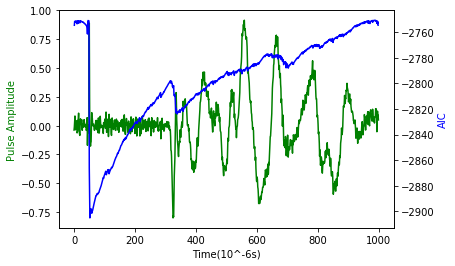

In [225]:
#This section 5 is to plot the pulse signal and AIC on the same plot on a double y axis plot: x-y1-y2

fig, ax1 = pyplot.subplots()              # create fig 

i=range(len(out0))                       # define x 

ax2 = ax1.twinx()                        # create 2 y axis as twin axis: ax1 and ax2
ax1.plot(i, out0[:,0], 'g-')             # define 1st y axis: x=i, y1=first column of out0, color is green  
ax2.plot(i, out0[:,1], 'b-')             # define 2nd y axis: x=i, y2=2nd column of out0, color is blue  
ax1.set_xlabel('Time(10^-6s)')           # write x axis labe name, default color is black
ax1.set_ylabel('Pulse Amplitude', color='g')
ax2.set_ylabel('AIC', color='b') 

pyplot.savefig('AIC-Pulse0.pdf')        # save the plot into the pdf
pyplot.show()

 #  Another option to save fig
    #fig = plt.gcf(), gcf: Get Current Figure
    #plt.show()
    #fig.savefig('tessstttyyy.png', dpi=100)


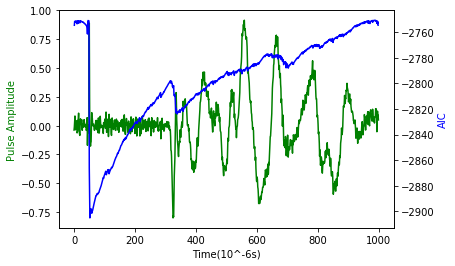

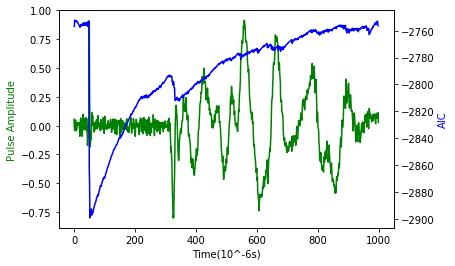

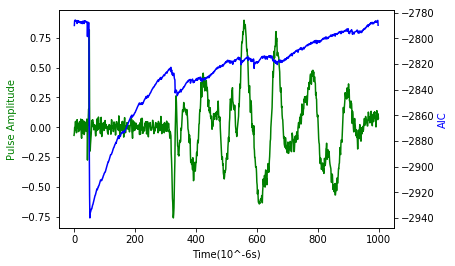

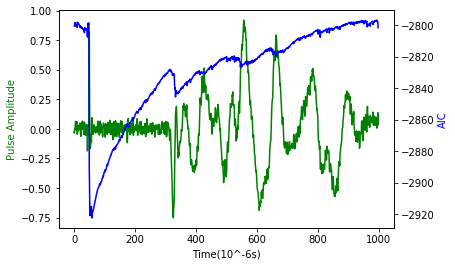

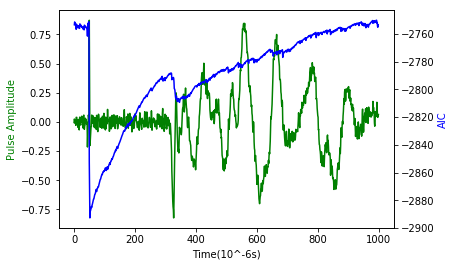

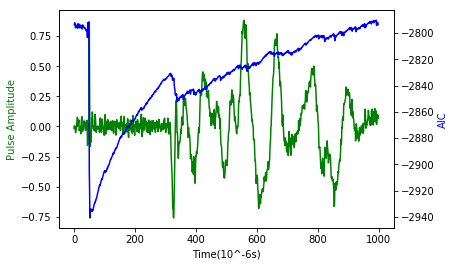

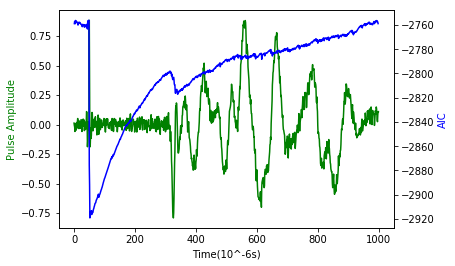

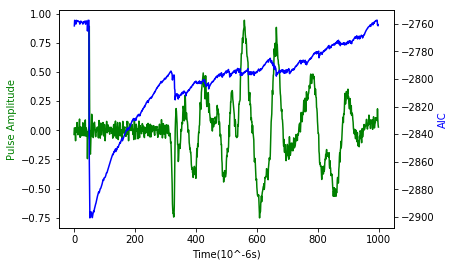

In [227]:
# This section 6 is to create a function 'fig(out)' to apply the ploting to more output data

def fig(out):
    fig, ax1 = pyplot.subplots()              # create fig 
    
    i=range(len(out0))                       # define x 

    ax2 = ax1.twinx()                        # create 2 y axis as twin axis: ax1 and ax2
    
    ax1.plot(i, out[:,0], 'g-')             # define 1st y axis: x=i, y1=first column of out0, color is green  
    ax2.plot(i, out[:,1], 'b-')             # define 2nd y axis: x=i, y2=2nd column of out0, color is blue  
   
    ax1.set_xlabel('Time(10^-6s)')           # write x axis labe name, default color is black
    ax1.set_ylabel('Pulse Amplitude', color='g')
    ax2.set_ylabel('AIC', color='b') 
    return 
    
fig(out0)
pyplot.gcf().savefig('Pulse-AIC0.pdf')
fig(out1)
pyplot.gcf().savefig('Pulse-AIC1.pdf')
fig(out2)
pyplot.gcf().savefig('Pulse-AIC2.pdf')
fig(out3)
pyplot.gcf().savefig('Pulse-AIC3.pdf')
fig(out4)
pyplot.gcf().savefig('Pulse-AIC4.pdf')
fig(out5)
pyplot.gcf().savefig('Pulse-AIC5.pdf')
fig(out6)
pyplot.gcf().savefig('Pulse-AIC6.pdf')
fig(out7)
pyplot.gcf().savefig('Pulse-AIC7.pdf')